In [1]:
#Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [2]:
raw_csv_data = pd.read_csv("013 IndexE8.csv")

In [3]:
raw_csv_data.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [4]:
df = raw_csv_data.copy()

In [5]:
df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [6]:
df.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

<AxesSubplot:>

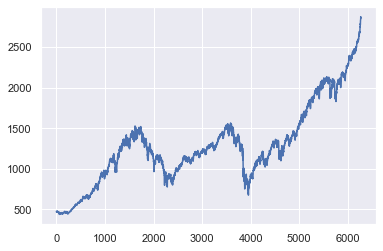

In [7]:
df.spx.plot()

In [8]:
import scipy.stats
import pylab

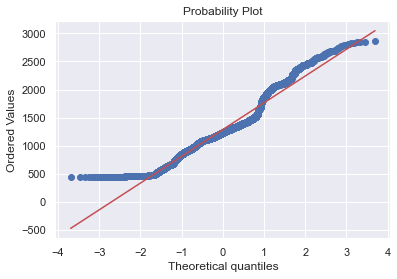

In [9]:
scipy.stats.probplot(df.spx,plot=pylab)
pylab.show()

In [10]:
df.date = pd.to_datetime(df.date,dayfirst = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    6269 non-null   datetime64[ns]
 1   spx     6269 non-null   float64       
 2   dax     6269 non-null   float64       
 3   ftse    6269 non-null   float64       
 4   nikkei  6269 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 245.0 KB


In [11]:
df.date.head()

0   1994-01-07
1   1994-01-10
2   1994-01-11
3   1994-01-12
4   1994-01-13
Name: date, dtype: datetime64[ns]

In [12]:
df.set_index("date",inplace=True)
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [13]:
df = df.asfreq("b") # b for business days
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


### Imputation

In [14]:
df.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [15]:


df.spx = df.spx.fillna(method="ffill")
df.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [16]:
df.ftse = df.ftse.fillna(method="bfill")
df.dax = df.dax.fillna(value=df.dax.mean())
df.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [17]:
df.nikkei = df.nikkei.fillna(method="bfill")

In [18]:
df['market_value'] = df.spx
df.head()

,spx,dax,ftse,nikkei,market_value
date,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,469.90
1994-01-10,475.27,2225.00,3440.58,18443.44,475.27
1994-01-11,474.13,2228.10,3413.77,18485.25,474.13
1994-01-12,474.17,2182.06,3372.02,18793.88,474.17
1994-01-13,472.47,2142.37,3360.01,18577.26,472.47


In [19]:
del df["spx"], df["dax"], df["ftse"], df["nikkei"]

### Splitting

In [20]:
df_market_value = df.copy()

In [21]:
size = int(len(df)*0.8)
df = df.iloc[:size]


In [22]:
df_test = df_market_value.iloc[size:]

In [23]:
df.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [24]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


### Seasionality

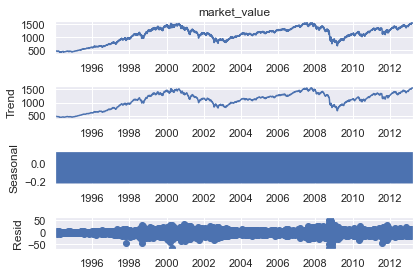

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

s_dec_additive = seasonal_decompose(df.market_value,model="additive")
s_dec_additive.plot()
plt.show()

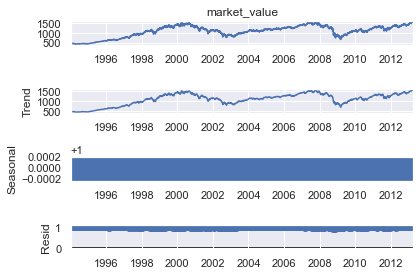

In [26]:
s_dec_multiplicative = seasonal_decompose(df.market_value,model="multiplicative")
s_dec_multiplicative.plot()
plt.show()

### White noise

In [27]:
wn = np.random.normal(loc=df.market_value.mean(),scale=df.market_value.std(),size=len(df))
df['wn'] = wn
df.head()

,market_value,wn
date,,
1994-01-07,469.90,1129.537060
1994-01-10,475.27,1115.708787
1994-01-11,474.13,1402.315899
1994-01-12,474.17,768.338554
1994-01-13,472.47,1025.593338


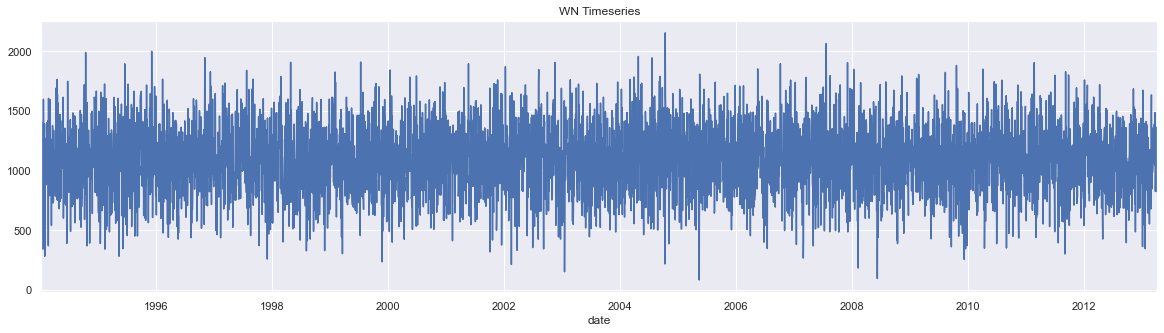

In [28]:
df.wn.plot(figsize=(20,5))
plt.title("WN Timeseries")
plt.show()

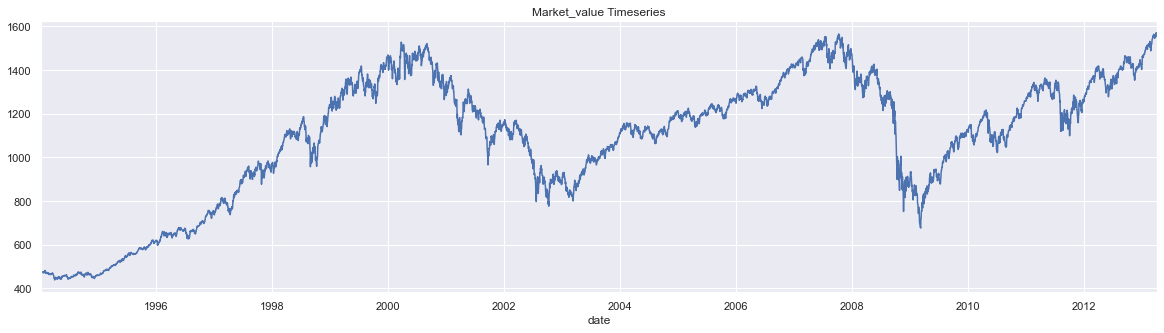

In [29]:
df.market_value.plot(figsize=(20,5))
plt.title("Market_value Timeseries")
plt.show()

### Random Walk

In [30]:
#new data
rw = pd.read_csv("RandWalk.csv")
rw.date = pd.to_datetime(rw.date,dayfirst=True)
rw.set_index("date",inplace=True)
rw.asfreq("b")
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-08,1135.238562
1994-01-09,1109.897831
1994-01-10,1080.347860
1994-01-11,1082.095245


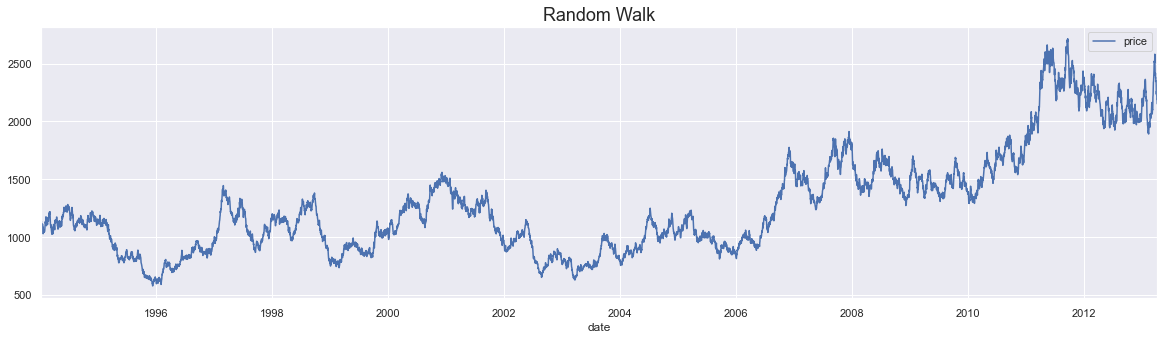

In [31]:
rw.plot(figsize=(20,5))
plt.title("Random Walk",size=18)
plt.show()

In [32]:
df['rw'] = rw.price

In [33]:
df.describe()

,market_value,wn,rw
count,5021.000000,5021.000000,5021.000000
mean,1091.651926,1087.508158,1269.944293
std,292.559287,290.726765,444.216793
min,438.920000,80.101043,585.483034
25%,914.620000,887.728636,931.550429
50%,1144.650000,1092.147875,1156.363045
75%,1316.280729,1287.474196,1488.362029
max,1570.252238,2151.345698,2715.508720


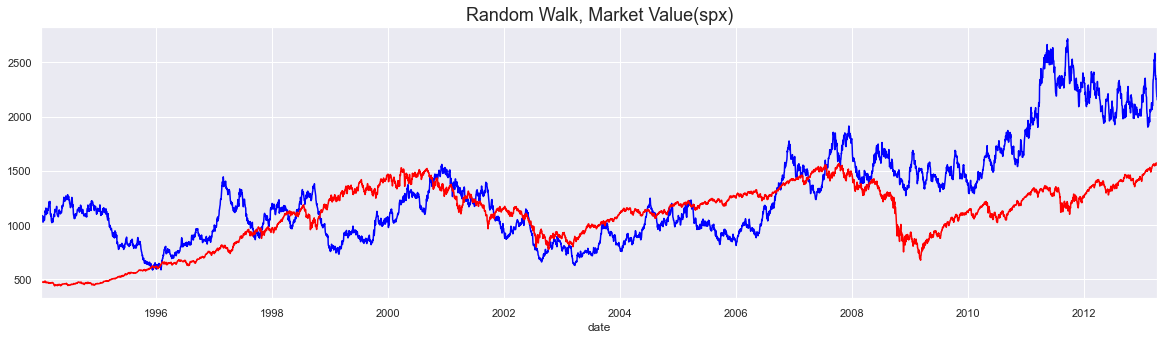

In [34]:
##
plt.figure(figsize=(20,5))
df.rw.plot(c="blue")
df.market_value.plot(c="red")
plt.title("Random Walk, Market Value(spx)",size=18)
plt.show()

 **Stationarity == Covariance Stationarity**  
 >means the [cov(t,t+k) == cov(t+tou, t+tou+k)] where cov = covariance  
 White noise follows the definition of Stationarity
 The Dickey-Fuller test is used to identify stationarity
 it's H0(null hypothesis) assumes the time series to be non-stationary

#### Dickey-Fuller Test

In [35]:
import statsmodels.tsa.stattools as sts

In [36]:
sts.adfuller(df.market_value)

(-1.7369847452352427,
 0.4121645696770626,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [37]:
sts.adfuller(df.wn)

(-71.92948535906496,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70742.84634833499)

In [38]:
sts.adfuller(df.rw)

(-1.328607392768972,
 0.6159849181617384,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

### Auto Correlation 
> Correlation between the sequence and itself at different intervals

In [39]:
import statsmodels.graphics.tsaplots as sgt

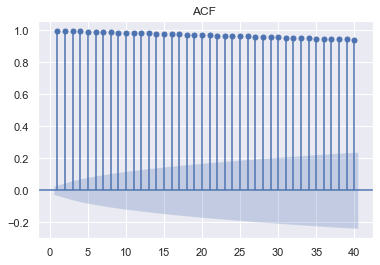

In [40]:
sgt.plot_acf(df.market_value,lags=40,zero=False)
plt.title("ACF ")
plt.show()

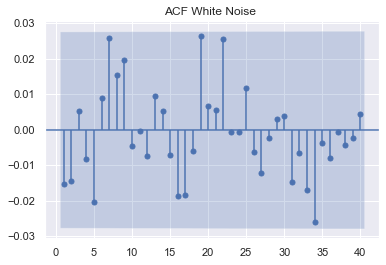

In [41]:
sgt.plot_acf(df.wn,lags=40,zero=False)
plt.title("ACF White Noise ")
plt.show()

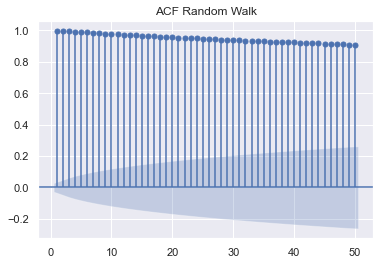

In [42]:
sgt.plot_acf(df.rw,lags=50,zero=False)
plt.title("ACF Random Walk")
plt.show()

### Partial Autocorrelation

 We compute direct correlation between a previous lagged value to the current one, 
 instead of indirect like in autocorrelation.

 It cancels out all the additional channels a previous period value affects the present one.

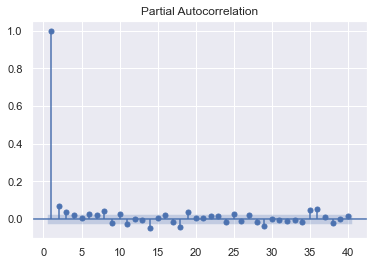

In [43]:
# plot_pacf function is used
sgt.plot_pacf(df.market_value,lags=40,zero=False, method=("ols"))
plt.title("Partial Autocorrelation")
plt.show()

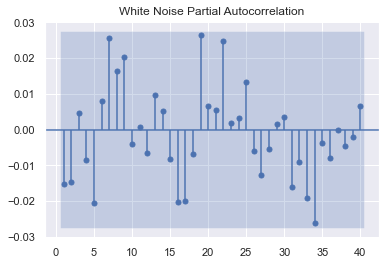

In [44]:
sgt.plot_pacf(df.wn,lags=40,zero=False, method=("ols"))
plt.title("White Noise Partial Autocorrelation")
plt.show()

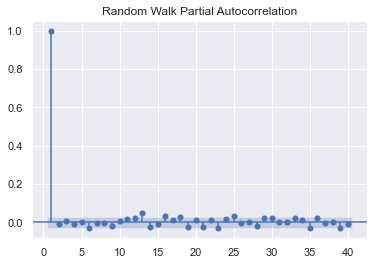

In [45]:
sgt.plot_pacf(df.rw,lags=40,zero=False, method=("ols"))
plt.title("Random Walk Partial Autocorrelation")
plt.show()